<a href="https://colab.research.google.com/github/prateeksohlot/data-science-projects/blob/master/Vehicle_data/vehicle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project

In [28]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import impute, preprocessing, ensemble
from statsmodels.imputation.mice import MICEData

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/My Drive/dataset/Project_Dataset.csv")
pd.set_option('display.max_columns', None)
data.columns = data.columns.str.lower()
data.head()

,sample_id,charge_mode_distance,send_time,vehicle_id,operation_time,operation_distance,sender,gear_level_auto_time,gear_level_man_time,total_distance,brake_time,cruise_time,drive_distance,drive_fuel,drive_time,idle_fuel,coasting_time,econ_time,idle_time,key_on_time,pedal_time,measure35,measure36,measure37,measure38,measure39,measure40,measure41,measure42,measure43,measure44,measure45,measure46,measure47,measure48,measure49,measure_g-1_time,state_of_health_battery,diesel_mode_total_fuel,measure50,measure51,measure_3,electric_mode_time,hybrid_mode_time,charge_mode_time,diesel_mode_time,total_time,electric_mode_distance,hybrid_mode_distance,diesel_mode_distance,total_distance.1,battery_version,battery_replacement_date,battery_generation,fleet_id,country,vehicle_mrk_type,emission_level,current_yearly_mileage,measure_2,active_charge,mounted_battery_generation,measure_1,measure_r_d,engine_type,geo_area,city,cluster,measure_row,is_bttery_changed,is_pattern_available,is_fleet_tof_monitored,is_checked_in_vda,is_battery_supplier_type2_faulty,is_vip_fleet,battery_supplier
0,262526303,NaN,2019-03-11 17:35:14,1,9157.192,247897.59,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-08-01,1.0,1.0,1.0,1,1,1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1452,0,0,1,0,0,0,1.0
1,115517796,NaN,2017-11-10 18:09:35,1,3146.041,161516.35,1,NaN,NaN,50943.11,30.258,0.0,48675.90,70659.136735,1817.327,5865.829295,472.281,1057.848,655.672,3286.027,545.506,0.0,2.440,233.757,0.0,7172.360,0.0,146945.363,7.381,8346.973,5493.400,2.462,2057.210,0.0,2171.833,62.890,377.818,72.00,12.266667,NaN,NaN,592076.0,2057.210278,7665.232500,62.890000,2.461667,9787.794444,7172.360,155292.336,7.381,162472.077,0,2015-08-01,1.0,1.0,1.0,1,1,1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1452,0,0,1,0,0,0,1.0
2,251857645,NaN,2019-02-21 07:24:22,1,8900.673,134506.02,2,NaN,NaN,134506.02,82.958,NaN,128835.55,NaN,5034.430,NaN,NaN,NaN,2142.297,9236.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.343705,NaN,NaN,1937097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2015-08-01,1.0,1.0,1.0,1,1,1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1452,0,0,1,0,0,0,1.0
3,47893312,NaN,2015-12-20 16:26:27,1,1386.207,27599.18,1,NaN,NaN,26583.39,15.428,0.0,26575.87,40511.758138,968.510,4227.820362,257.613,533.573,418.214,1807.035,259.912,0.0,7.601,149.185,0.0,1231.270,NaN,25119.574,0.421,1423.459,972.323,0.440,363.056,0.0,387.353,9.554,181.474,95.50,9.177284,NaN,NaN,502436.0,363.055833,1359.675833,9.554167,0.440278,1732.726111,1231.270,26543.033,0.421,27774.724,0,2015-08-01,1.0,1.0,1.0,1,1,1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1452,0,0,1,0,0,0,1.0
4,96601019,NaN,2017-06-12 13:01:16,1,1146.683,129568.38,1,NaN,NaN,18833.12,10.635,0.0,17890.83,25190.736487,660.751,1808.061284,173.039,387.379,219.036,1201.605,205.879,0.0,0.917,84.712,0.0,5788.833,0.0,117941.308,2.521,6597.613,4383.228,2.010,1638.259,0.0,1719.744,48.558,138.314,76.25,0.545185,NaN,NaN,245435.0,1638.258611,6102.972222,48.557778,2.010278,7791.798889,5788.833,124538.921,2.521,130330.275,0,2015-08-01,1.0,1.0,1.0,1,1,1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1452,0,0,1,0,0,0,1.0


In [4]:
data.shape

(861916, 76)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861916 entries, 0 to 861915
Data columns (total 76 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   sample_id                         861916 non-null  int64  
 1   charge_mode_distance              238078 non-null  float64
 2   send_time                         860235 non-null  object 
 3   vehicle_id                        861916 non-null  int64  
 4   operation_time                    861815 non-null  float64
 5   operation_distance                826697 non-null  float64
 6   sender                            861916 non-null  int64  
 7   gear_level_auto_time              109882 non-null  float64
 8   gear_level_man_time               109906 non-null  float64
 9   total_distance                    798851 non-null  float64
 10  brake_time                        278583 non-null  float64
 11  cruise_time                       202469 non-null  f

In [6]:
data.describe(include = 'all')

,sample_id,charge_mode_distance,send_time,vehicle_id,operation_time,operation_distance,sender,gear_level_auto_time,gear_level_man_time,total_distance,brake_time,cruise_time,drive_distance,drive_fuel,drive_time,idle_fuel,coasting_time,econ_time,idle_time,key_on_time,pedal_time,measure35,measure36,measure37,measure38,measure39,measure40,measure41,measure42,measure43,measure44,measure45,measure46,measure47,measure48,measure49,measure_g-1_time,state_of_health_battery,diesel_mode_total_fuel,measure50,measure51,measure_3,electric_mode_time,hybrid_mode_time,charge_mode_time,diesel_mode_time,total_time,electric_mode_distance,hybrid_mode_distance,diesel_mode_distance,total_distance.1,battery_version,battery_replacement_date,battery_generation,fleet_id,country,vehicle_mrk_type,emission_level,current_yearly_mileage,measure_2,active_charge,mounted_battery_generation,measure_1,measure_r_d,engine_type,geo_area,city,cluster,measure_row,is_bttery_changed,is_pattern_available,is_fleet_tof_monitored,is_checked_in_vda,is_battery_supplier_type2_faulty,is_vip_fleet,battery_supplier
count,8.619160e+05,238078.0,860235,861916.000000,861815.000000,826697.000000,861916.000000,109882.000000,109906.00000,798851.000000,278583.000000,202469.000000,506445.000000,5.032910e+05,536956.000000,503274.000000,181441.000000,161594.000000,788100.000000,532004.000000,181251.000000,202294.000000,181269.000000,161567.000000,424111.000000,427152.000000,133646.000000,661906.000000,661922.000000,465493.000000,473534.000000,445570.000000,467305.000000,467216.000000,465362.000000,467094.000000,1.612370e+05,213860.000000,225385.000000,271163.000000,2.656360e+05,3.006480e+05,6.545090e+05,654104.000000,6.544760e+05,6.329780e+05,6.309890e+05,617031.000000,659976.000000,660637.000000,615662.000000,861916.000000,857052,836463.000000,723818.000000,861915.000000,861916.000000,861916.000000,861916.00000,646879.000000,29631.000000,861837.000000,750973.000000,774348.000000,725789.000000,724928.000000,713059.000000,568613.000000,861916.000000,861916.000000,861916.000000,861916.000000,861916.000000,861916.000000,861916.000000,836463.000000
unique,NaN,NaN,757056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2013-04-11 10:02:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.605535e+08,0.0,NaN,914.695734,8950.790168,168684.138197,1.833639,6954.796127,0.02447,168093.327635,93.198303,2.318812,155092.674399,2.249406e+05,5370.606848,16964.597799,1178.372773,2942.647370,2422.450477,9982.880151,1569.209152,0.051096,46.385956,615.662478,0.901495,7573.258953,9.649170,169547.478055,61.481415,6781.350173,4809.420994,9.675092,2333.207444,0.275380,1476.301991,25.018116,9.916824e+02,82.849888,211.315261,2916.653578,2.188812e+03,2.200109e+06,2.559039e+03,9380.684591,3.872595e+01,1.705938e+01,1.219556e+04,6799.205918,186747.229050,68.730186,196896.154366,0.102657,NaN,1.746087,54.372580,4.280604,2.733117,1.330508,5.07670,1.085858,1.018157,1.700433,3.177602,11.733245,1.392464,1.224586,14.587535,2.591699,2017.983685,0.195157,0.047081,0.200031,0.344520,0.002894,0.042605,1.687913
std,1.040139e+08,0.0,NaN,907.401415,5888.556969,106473.041228,0.477447,6005.307955,2.41849,105243.858682,954.888471,677

In [7]:
data['send_time'] = pd.to_datetime(data['send_time'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d/%m/%y %H:%M:%S')

In [8]:
data['send_time']

0         11/03/19 17:35:14
1         10/11/17 18:09:35
2         21/02/19 07:24:22
3         20/12/15 16:26:27
4         12/06/17 13:01:16
                ...        
861911    26/06/12 06:24:59
861912    11/09/19 00:23:34
861913    30/05/18 17:14:19
861914    17/03/15 11:05:49
861915    08/08/19 11:51:28
Name: send_time, Length: 861916, dtype: object

In [9]:
time_series = ['send_time', 'battery_replacement_date'] 
numerical = ['operation_time', 'gear_level_auto_time', 'gear_level_man_time', 'total_distance', 'brake_time', 'cruise_time', 'drive_distance', 'driver_fuel', 'drive_time', 'idle_fuel', 'coasting_time', 'econ_time', 'idle_time', 'pedal_time',\
             'measure35',	'measure36', 'measure37',	'measure38',	'measure39',	'measure40',	'measure41', 'measure42',	'measure43', 'measure44',	'measure45',	'measure46', 	'measure47', 	'measure48', 	'measure49', 'measure_g-1_time', \
             'state_of_health_battery', 'diesel_mode_total_fuel', 'measure50', 'measure51', 'measure_3', 'electric_mode_time', 'hybrid_mode_time', 'charge_mode_time', 'total_time', 'electric_mode_distance', 'hybrid_mode_distance',\
             ]
categorical = ['vehicle_id', 'sender', 'battery_version', 'battery_generation', 'fleet_id', 'country', 'vehicle_mrk_type', 'emission_level', 'current_yealy_mileage', 'measure_2', 'active_charge', 'mounted_battery_generation', 'measure_1',\
               'engine_type', 'geo_area', 'city', 'cluster', 'measured_row', 'is_battery_changed', 'is_pattern_available', 'is_fleet_tof_monitored', 'is_checked_in_vda', 'is_battery_supplier_type2_faulty', 'is_vip_fleet', 'battery_supplier']

In [10]:
for col in time_series:
  per = int((data[col].isnull().sum()/data.shape[0])*100)
  print(col, ' ', 'has null vales:', data[col].isnull().sum()/data.shape[0]*100)

send_time   has null vales: 0.1950306062307696
battery_replacement_date   has null vales: 0.5643241336742791


In [11]:
# print null count for all columns
droplist = []
for col in data.columns:
  per = int((data[col].isnull().sum()/data.shape[0])*100)
  print(col, ' ', 'has null vales:', data[col].isnull().sum()/data.shape[0]*100)

  if per >= 30:
    droplist.append(col)

sample_id   has null vales: 0.0
charge_mode_distance   has null vales: 72.37805076132709
send_time   has null vales: 0.1950306062307696
vehicle_id   has null vales: 0.0
operation_time   has null vales: 0.011718079255983182
operation_distance   has null vales: 4.086129042737343
sender   has null vales: 0.0
gear_level_auto_time   has null vales: 87.25142589301046
gear_level_man_time   has null vales: 87.24864139892983
total_distance   has null vales: 7.316838299787914
brake_time   has null vales: 67.67863689733106
cruise_time   has null vales: 76.50942783287466
drive_distance   has null vales: 41.24195397231284
drive_fuel   has null vales: 41.60788290274226
drive_time   has null vales: 37.70204985172569
idle_fuel   has null vales: 41.609855252716045
coasting_time   has null vales: 78.94910872985302
econ_time   has null vales: 81.25176931394707
idle_time   has null vales: 8.564175627323312
key_on_time   has null vales: 38.27658379702895
pedal_time   has null vales: 78.97115264132466
measu

In [12]:
len(droplist)

34

drop:
- Sample_ID (All unique)
- Charge_mode_DISTANCE (Either missing or value is 0)
- Nan from send_time

In [13]:
df = data[data['send_time'].notna()]

df['date'] = pd.to_datetime(df['send_time']).dt.date
df['time'] = pd.to_datetime(df['send_time']).dt.time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
df['date']

0         2019-11-03
1         2017-10-11
2         2019-02-21
3         2015-12-20
4         2017-12-06
             ...    
861911    2012-06-26
861912    2019-11-09
861913    2018-05-30
861914    2015-03-17
861915    2019-08-08
Name: date, Length: 860235, dtype: object

In [15]:
df['time']

0         17:35:14
1         18:09:35
2         07:24:22
3         16:26:27
4         13:01:16
            ...   
861911    06:24:59
861912    00:23:34
861913    17:14:19
861914    11:05:49
861915    11:51:28
Name: time, Length: 860235, dtype: object

In [16]:
df = df.drop(['send_time', 'battery_replacement_date', 'charge_mode_distance'], axis =1)

In [17]:
df.shape

(860235, 75)

In [18]:
# z = np.abs(stats.zscore(df.values))
# df =df[(z<3)]

In [19]:
# df.shape

## Data Visualisation

Text(0.5, 1.0, 'Percent missing data by feature')

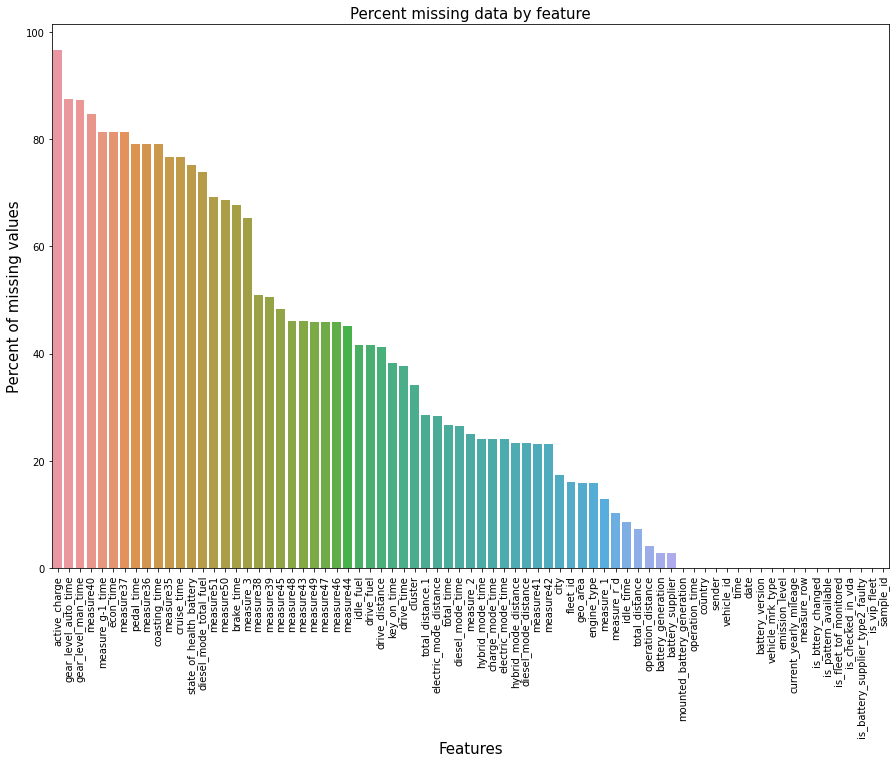

In [20]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [21]:
corr = df.corr()
corr

,sample_id,vehicle_id,operation_time,operation_distance,sender,gear_level_auto_time,gear_level_man_time,total_distance,brake_time,cruise_time,drive_distance,drive_fuel,drive_time,idle_fuel,coasting_time,econ_time,idle_time,key_on_time,pedal_time,measure35,measure36,measure37,measure38,measure39,measure40,measure41,measure42,measure43,measure44,measure45,measure46,measure47,measure48,measure49,measure_g-1_time,state_of_health_battery,diesel_mode_total_fuel,measure50,measure51,measure_3,electric_mode_time,hybrid_mode_time,charge_mode_time,diesel_mode_time,total_time,electric_mode_distance,hybrid_mode_distance,diesel_mode_distance,total_distance.1,battery_version,battery_generation,fleet_id,country,vehicle_mrk_type,emission_level,current_yearly_mileage,measure_2,active_charge,mounted_battery_generation,measure_1,measure_r_d,engine_type,geo_area,city,cluster,measure_row,is_bttery_changed,is_pattern_available,is_fleet_tof_monitored,is_checked_in_vda,is_battery_supplier_type2_faulty,is_vip_fleet,battery_supplier
sample_id,1.000000,0.182084,0.547386,0.460491,-0.034374,0.302459,0.003021,0.451216,0.031672,-0.002905,0.385876,0.405790,0.392009,0.244405,0.336614,0.293822,0.433977,0.395184,0.333052,-0.003275,0.179546,0.186186,0.042294,0.384960,-0.009598,0.446595,0.045974,0.374080,0.271343,0.109901,0.377806,0.054512,0.283943,0.332044,0.004536,-0.528833,0.074522,-0.007591,0.143711,0.333656,0.279310,0.532325,0.013311,0.004936,0.443766,0.192248,0.519794,0.048055,0.509350,-0.037207,0.079853,0.041951,-0.043837,-0.110134,0.048151,0.066737,0.007573,-0.045579,0.072025,0.110978,-0.180865,0.184408,-0.033307,-0.197052,0.018365,0.442901,-0.048148,0.087222,-0.086940,-0.173795,0.034147,-0.057272,0.146667
vehicle_id,0.182084,1.000000,-0.061254,-0.117301,-0.219002,0.072182,0.008199,-0.097549,-0.014805,0.002756,-0.115949,-0.104353,-0.060476,0.122911,-0.067237,-0.018453,-0.036124,-0.060883,-0.026669,-0.000998,-0.093600,-0.059840,0.017784,-0.211281,0.017204,-0.097635,-0.058212,-0.101399,-0.031666,-0.028798,-0.214249,0.019202,0.015296,0.010074,0.000059,0.182576,-0.064862,0.323502,0.037353,-0.096453,-0.108479,-0.084663,-0.002345,-0.000770,-0.106533,-0.083207,-0.121407,-0.070784,-0.141991,0.060449,0.204115,0.595880,-0.007094,0.209245,0.057435,0.068938,-0.134162,-0.023329,0.216902,0.338704,0.296065,0.246499,0.042113,0.304016,-0.019769,-0.026496,0.065186,-0.020321,0.125782,-0.017457,0.077122,-0.001143,0.165501
operation_time,0.547386,-0.061254,1.000000,0.912592,0.024791,0.756917,0.002764,0.923585,0.066624,-0.002313,0.904198,0.924464,0.968666,0.831947,0.931066,0.951248,0.902616,0.986942,0.904519,-0.000483,0.313096,0.448096,-0.004409,0.353561,0.012556,0.839170,0.082940,0.680808,0.724699,0.246854,0.570984,0.013607,0.684667,0.370392,0.050854,-0.411398,0.322752,0.397048,0.729902,0.845679,0.500007,0.928677,0.570995,0.359429,0.921040,0.052795,0.845891,0.043482,0.837531,0.182807,0.331483,-0.193501,-0.278034,0.094072,0.499326,-0.062878,0.035717,-0.204556,0.295182,0.001789,-0.159005,0.479452,-0.075994,-0.202288,-0.243597,0.382082,0.271390,0.036910,-0.061046,0.074997,-0.036731,0.025331,0.375112
operation_distance,0.460491,-0.117301,0.912592,1.000000,-0.060846,0.702970,0.019008,0.993787,0.075619,-0.002098,0.985931,0.968659,0.956611,0.612005,0.929268,0.951541,0.730659,0.924972,0.949426,-0.000864,0.460008,0.493728,-0.002411,0.370399,0.013780,0.889887,0.168915,0.617947,0.714761,0.275717,0.605047,0.013080,0.502364,0.198911,0.063663,-0.396140,0.378556,0.457182,0.296655,0.916893,0.600132,0.851629,0.425131,0.354106,0.875141,0.147379,0.927087,0.130730,0.926315,0.168391,0.254694,-0.181607,-0.191393,0.100661,0.407755,-0.030475,0.033848,-0.151766,0.211195,-0.097071,-0.056031,0.352869,-0.055450,-0.090055,-0.086896,0.253871,0.254028,0.033426,-0.083742,0.112385,-0.046149,0.031347,0.282388
sender,-0.034374,-0.219002,0.024791,-0.060846,1.000000,-0.276941,-0.005772,-0.018053,0.000613,-0.001490,-0.052562,-0.065105,-0.096582,-0.174572,-0.213761,-0.173643,0.011237,-0.104988,-0.207115,-0.002044,-

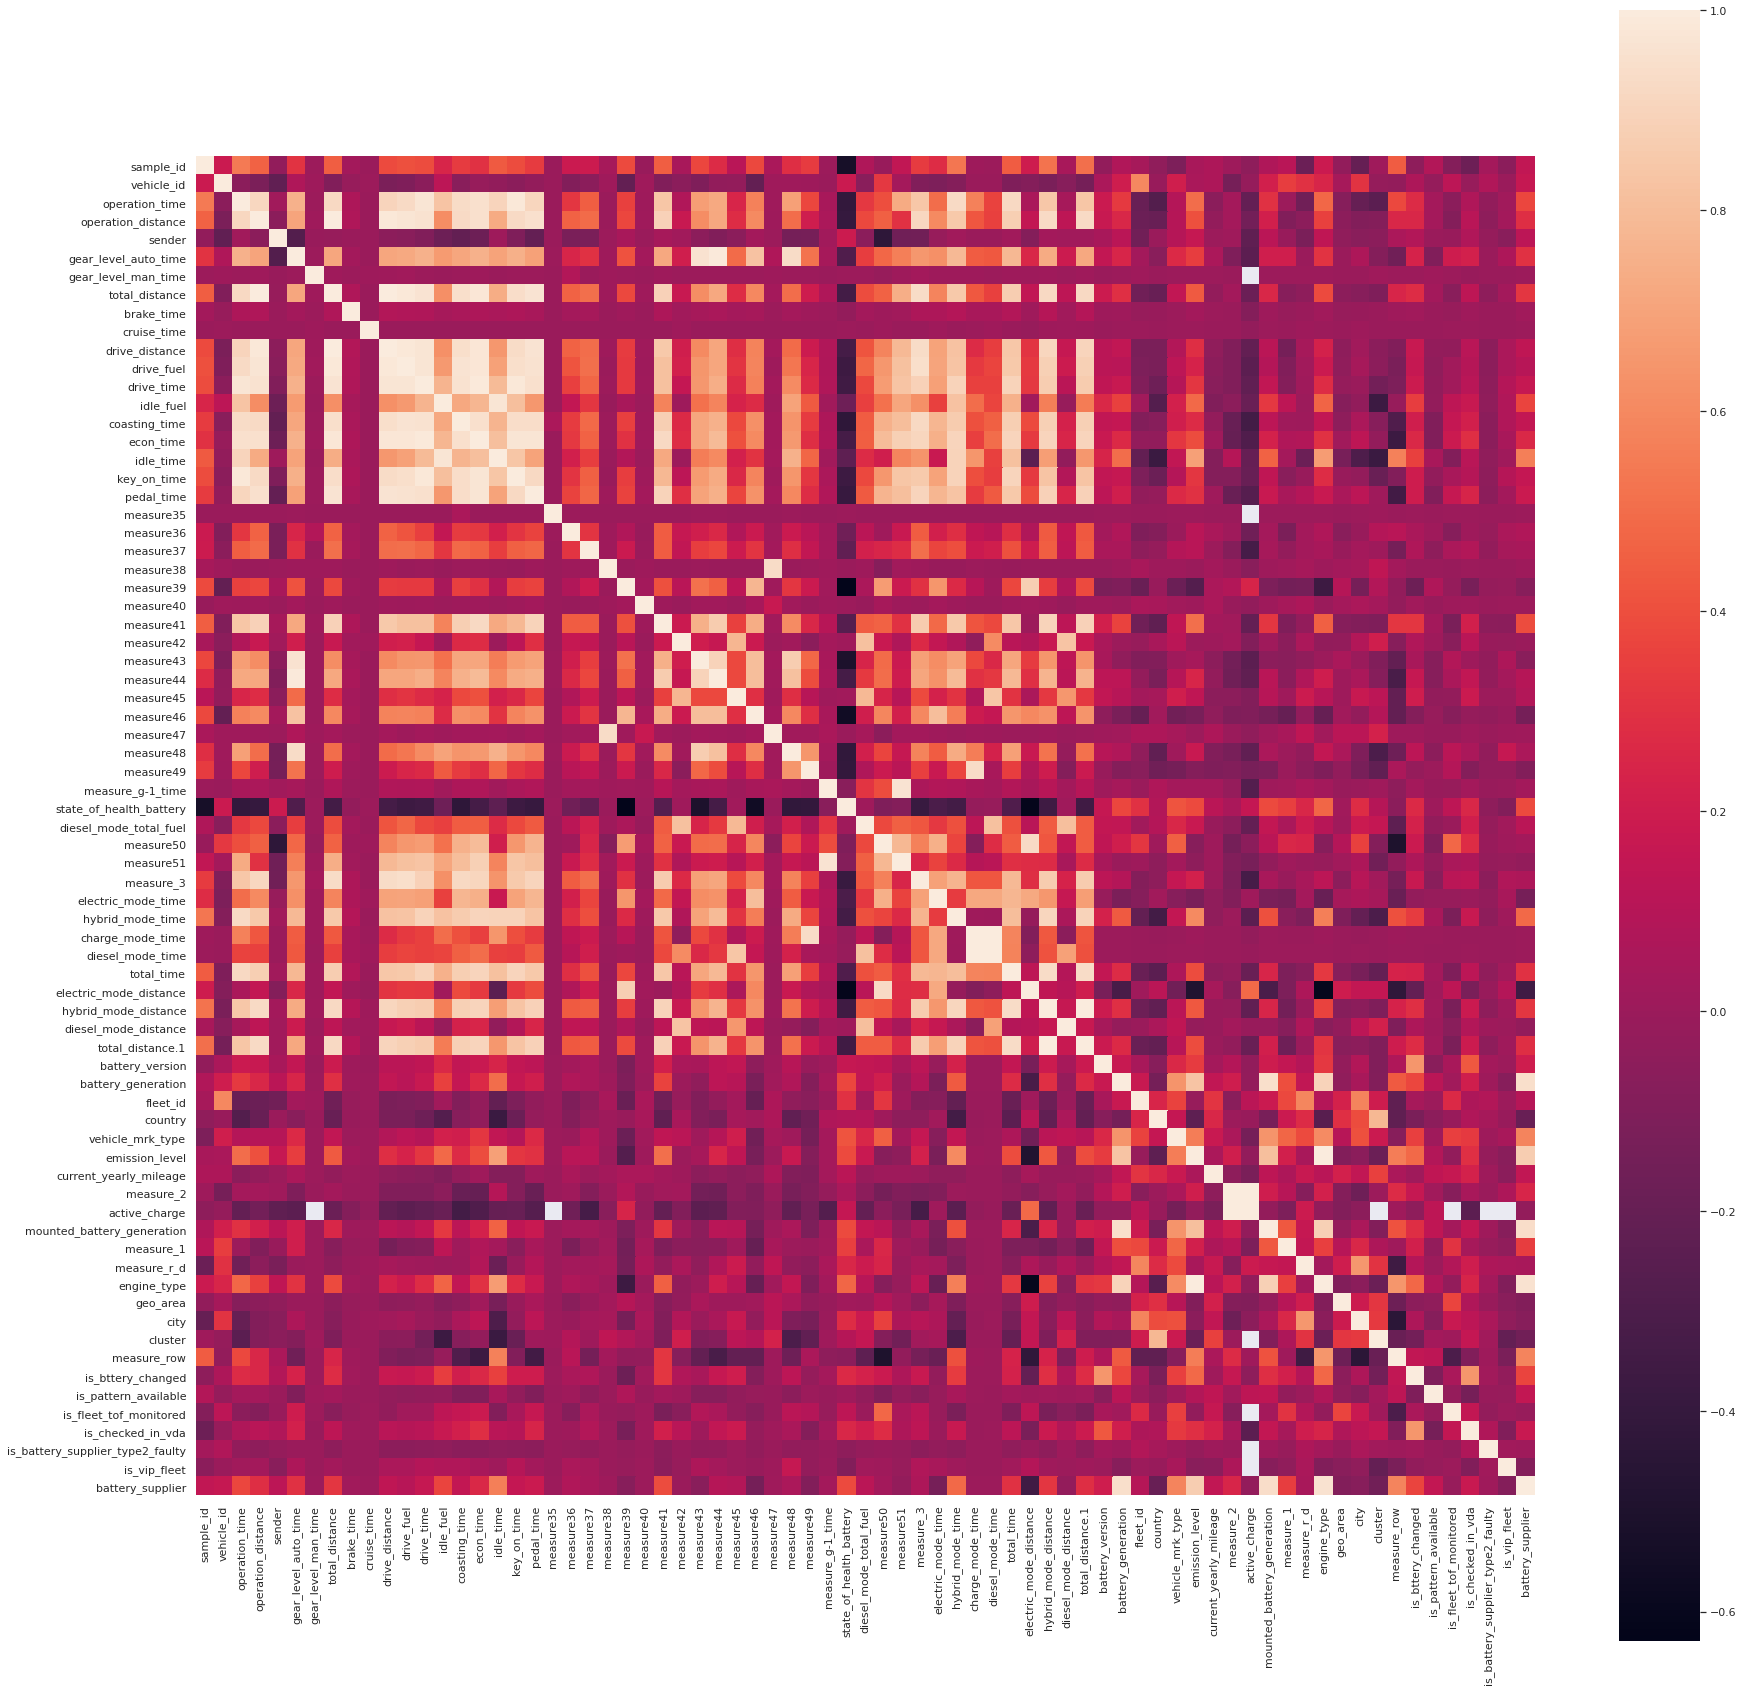

In [55]:
sns.set()
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, annot=False, square=True, ax=ax)

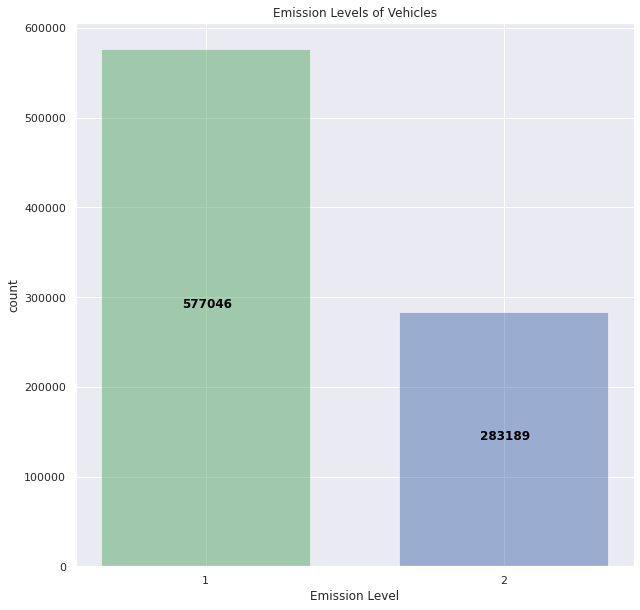

In [56]:
emission = df.groupby('emission_level').size().reset_index()
emission.columns = ['emission_level','count']

fig , ax = plt.subplots(figsize = (10,10))
ax.bar(emission['emission_level'],emission['count'],width=0.7,color=['g','b'],alpha=0.5)
ax.set_title('Emission Levels of Vehicles')
ax.set_xticks([1,2])
ax.set_xlabel('Emission Level')
ax.set_ylabel('count')

# This for loop puts numbers(annotations) inside the bars
for i, v in enumerate(emission['count'], start = 1):
    ax.text( i -.08,v/2, str(v), color='black', fontweight='bold') 

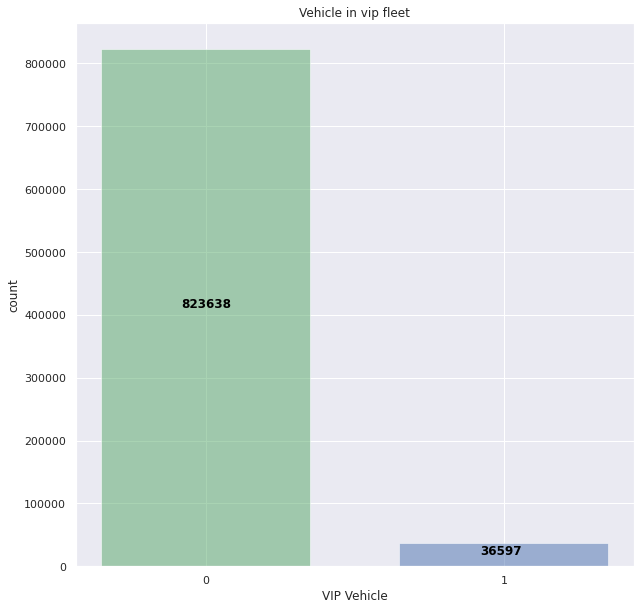

In [57]:
vip = df.groupby('is_vip_fleet').size().reset_index()
vip.columns = ['is_vip_fleet','count']

fig , ax = plt.subplots(figsize = (10,10))
ax.bar(vip['is_vip_fleet'],vip['count'],width=0.7,color=['g','b'],alpha=0.5)
ax.set_title('Vehicle in vip fleet')
ax.set_xticks([0,1])
ax.set_xlabel('VIP Vehicle')
ax.set_ylabel('count')

# This for loop puts numbers(annotations) inside the bars
for i, v in enumerate(vip['count']):
    ax.text( i -.08,v/2, str(v), color='black', fontweight='bold')

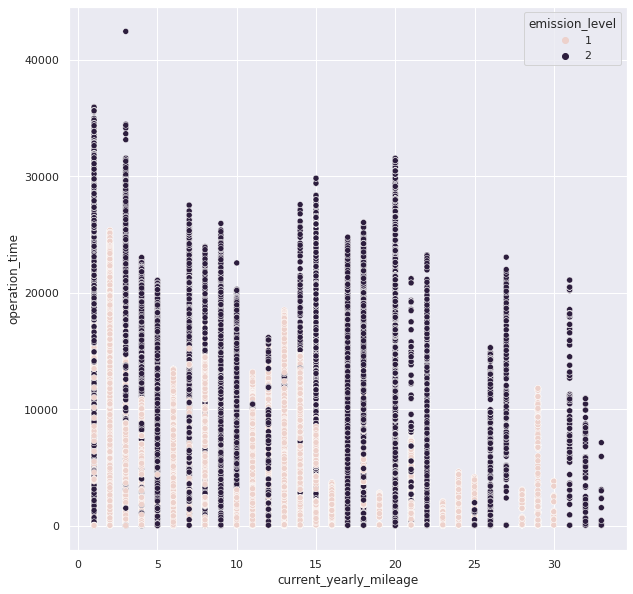

In [58]:
ax, fig = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'current_yearly_mileage', y = 'operation_time', hue = 'emission_level', data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


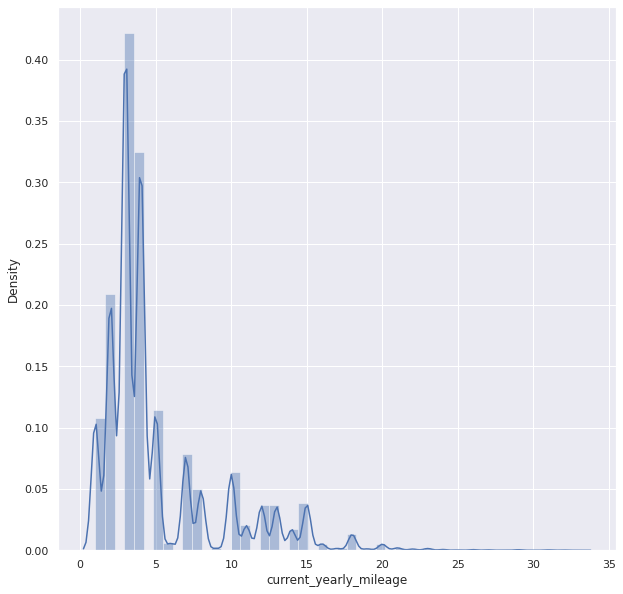

In [59]:
ax, fig = plt.subplots(figsize = (10,10))
sns.distplot(df['current_yearly_mileage'])

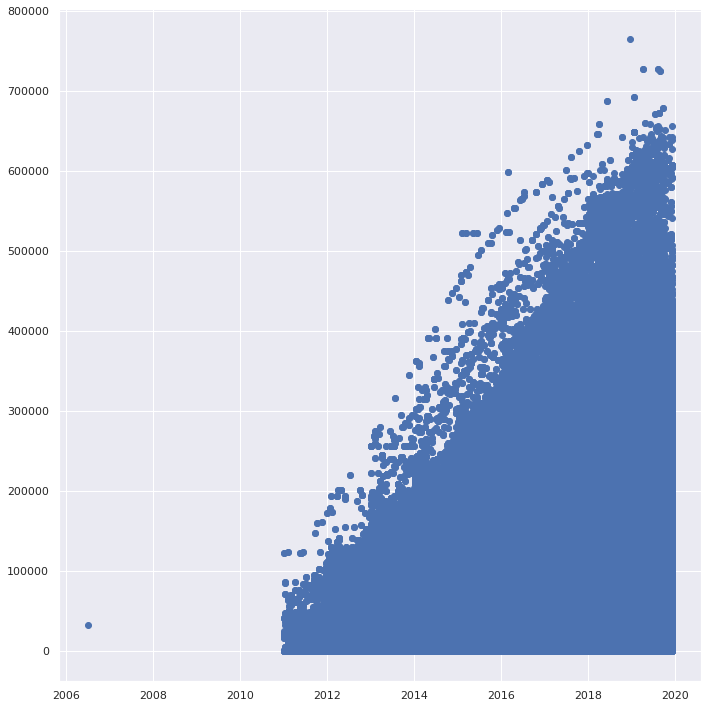

In [60]:
plt.figure(figsize=(10,10))
plt.plot_date(df['date'], df['total_distance'])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


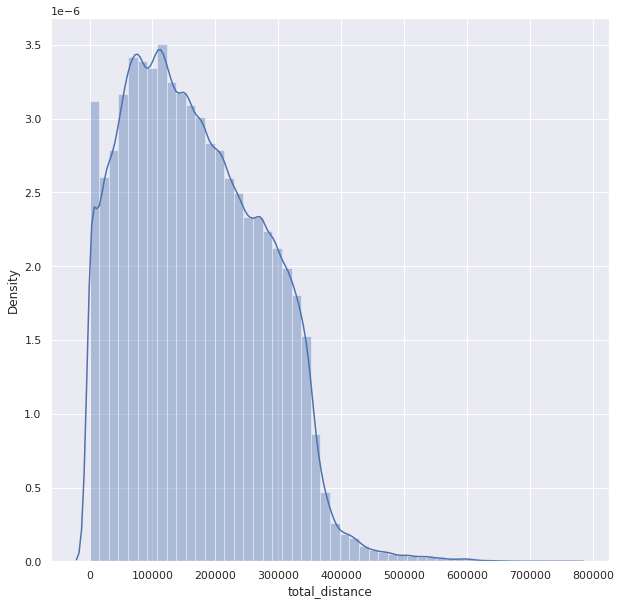

In [61]:
ax, fig = plt.subplots(figsize = (10,10))
sns.distplot(df['total_distance'])

In [62]:
id = df.groupby('vehicle_id').size().reset_index()
emission.columns = ['vehicle_cg','count']
emission

,vehicle_cg,count
0,1,577046
1,2,283189


## Data Preprocessing

### Data Imputation

In [22]:
dx = df.drop(['date', 'time'], axis=1)

KNN Imputation

In [ ]:
knn = impute.KNNImputer(n_neighbors=2, weights="distance")
dknn = knn.fit_transform(dx)

Multiple Iterative

In [ ]:
from sklearn.experimental import enable_interative_imputer

In [ ]:
imp_mean = imputer.IterativeImputer(random_state=42)

In [ ]:
imp_mean.fit_transform(dx)


Forward Imputation

In [24]:
df.fillna(method='bfill', inplace=True)
df.fillna(method='ffill',inplace=True)

We are using Emission Levels as labels

In [25]:
df['emission_level']

0         1
1         1
2         1
3         1
4         1
         ..
861911    2
861912    1
861913    2
861914    2
861915    1
Name: emission_level, Length: 860235, dtype: int64

In [26]:
encoder = preprocessing.LabelEncoder()
emission = pd.Series(encoder.fit_transform(df['emission_level']))
print(emission)

0         0
1         0
2         0
3         0
4         0
         ..
860230    1
860231    0
860232    1
860233    1
860234    0
Length: 860235, dtype: int64


In [ ]:
'''
for col in df.columns:
  per = int((df[col].isnull().sum()/df.shape[0])*100)
  print(col, ' ', 'has null vales:', df[col].isnull().sum()/df.shape[0]*100)
'''

In [ ]:
scaler = preprocessing.StandardScaler()